# The main goal of this project is to create an application that, given a set of RGB colors, plots an intensity map of the image. For this, some similarity measures will be used to calculate the distance between the image pixels and the data point.

### First, we create a set of rgb colors for testing

(57, 81, 97) (227, 197, 125)


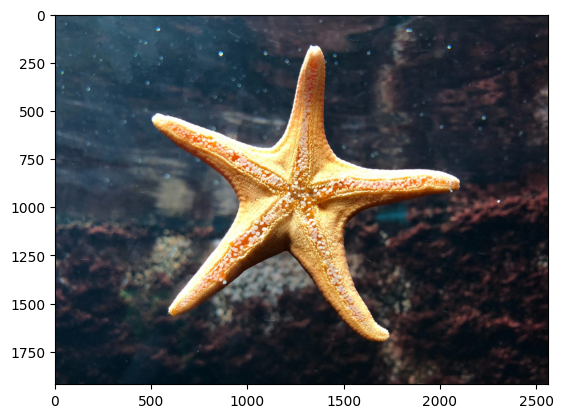

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

# Read starfish image and plot it
starfish = cv.imread('./starfish.jpg')
starfish = cv.cvtColor(starfish, cv.COLOR_BGR2RGB)
plt.imshow(starfish)

# Creates the colors set
r,g,b = 0,0,0
starfish_rgb_set = [(244,206,121),(254,255,175),(184,131,79)]
background_rgb_set = [(32,63,91),(84,117,126),(56,65,74)]

# Calculate the mean color of starfish_rgb_set
for color in starfish_rgb_set:
    r += color[0]
    g += color[1]
    b += color[2]
starfish_rgb_mean = (r//len(starfish_rgb_set), g//len(starfish_rgb_set), b//len(starfish_rgb_set))

r,g,b = 0,0,0
# Calculate the mean color of background_rgb_set
for color in background_rgb_set:
    r += color[0]
    g += color[1]
    b += color[2]
background_rgb_mean = (r//len(starfish_rgb_set), g//len(starfish_rgb_set), b//len(starfish_rgb_set))

# Print means
print(background_rgb_mean, starfish_rgb_mean)

### Similarity distance functions

In [13]:
def euclidean_measure(x, y):
    return sqrt(pow(x[0]-y[0],2) + pow(x[1]-y[1],2) + pow(x[2]-y[2],2))

# Max e min distances
print(euclidean_measure((255,255,255), (0,0,0)))
print(euclidean_measure((255,255,255), (255,255,255)))

441.6729559300637
0.0


### Apply the similarity measure for every pixel

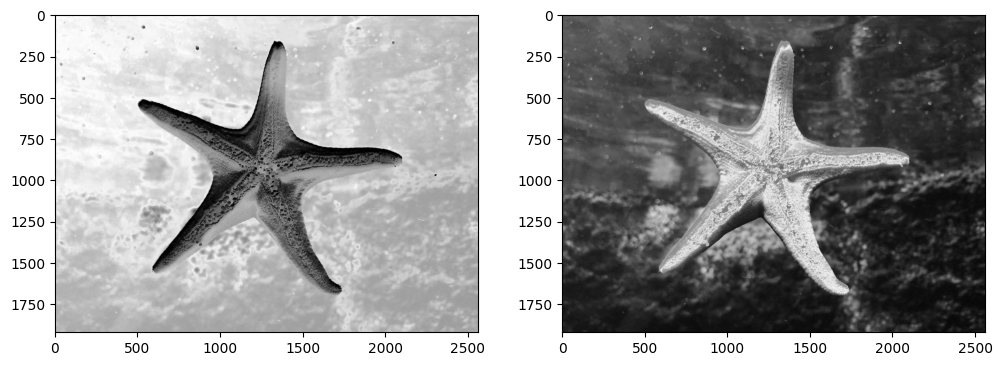

In [14]:
starfish_intensity_map = np.zeros((starfish.shape[0], starfish.shape[1]), np.uint8)
background_intensity_map = np.zeros((starfish.shape[0], starfish.shape[1]), np.uint8)
for y in range(starfish.shape[0]):
    for x in range(starfish.shape[1]):
        starfish_distance = int(euclidean_measure((starfish[y][x][0], starfish[y][x][1], starfish[y][x][2]), starfish_rgb_mean))
        starfish_gray_value = 255 - int(255*starfish_distance/442)
        background_distance = int(euclidean_measure((starfish[y][x][0], starfish[y][x][1], starfish[y][x][2]), background_rgb_mean))
        background_gray_value = 255 - int(255*background_distance/442)
        starfish_intensity_map[y][x] = starfish_gray_value
        background_intensity_map[y][x] = background_gray_value

fig, axes = plt.subplots(1,2, figsize=(12,13))
axes[0].imshow(background_intensity_map, 'gray')
axes[1].imshow(starfish_intensity_map, 'gray')